<a href="https://colab.research.google.com/github/TatyanaLanceva/Netology/blob/main/6_3_Cases_and_application_areas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание**


Цель задания
Научиться решать практические задачи с использованием pandas или pyspark на основе реальных данных и провести работу с данными от загрузки данных до построения модели.

Важно
Это задание не будет проверено экспертом, однако, стоит его выполнить, чтобы отработать теорию и с лёгкостью справляться с подобными задачами на практике.

Контекст
Дан [набор](https://colab.research.google.com/drive/1jTFKs-NP2RAtG-w3dt3sYluiPUOJfJzq#scrollTo=ACwYMqRAd053&line=2&uniqifier=1) данных по оттоку клиентов. Набор данных содержит всего 5 000 записей (то есть абонентов).

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
import warnings


In [68]:
df = pd.read_csv('/content/churn.csv')

In [50]:
df

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,50,408,365-8751,no,yes,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,False
4996,WV,152,415,334-9736,no,no,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,True
4997,DC,61,415,333-6861,no,no,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,False
4998,DC,109,510,394-2206,no,no,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,False


<Axes: title={'center': 'Гистограмма количества звонков в техническую поддержку'}, ylabel='Частота'>

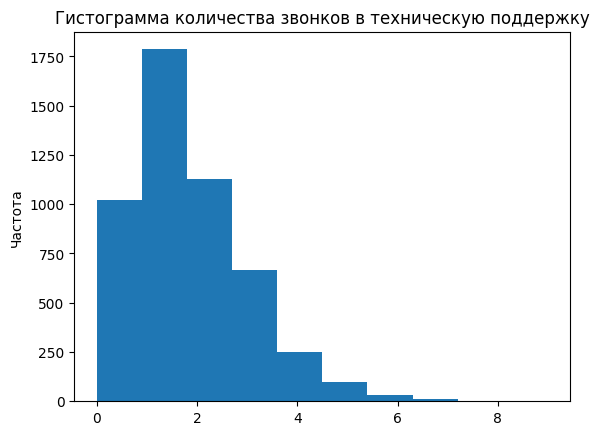

In [51]:
# Построить гистограмму количества звонков в техническую поддержку
df['number_customer_service_calls'].plot(kind = 'hist', title = 'Гистограмма количества звонков в техническую поддержку', ylabel='Частота')

<Axes: title={'center': 'Гистограмма общей длительности звонков клиента в минутах'}, ylabel='Частота'>

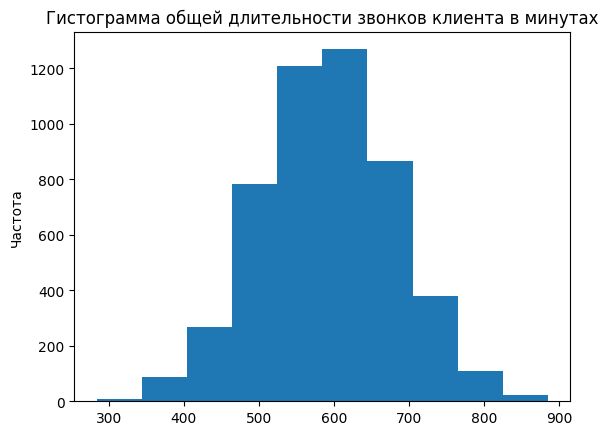

In [52]:
# Рассчитать и построить гистограмму общей длительности звонков клиента (дневных + ночных + вечерних + международных)
df['sum_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes'] + df['total_intl_minutes']
df['sum_minutes'].plot(kind = 'hist', title = 'Гистограмма общей длительности звонков клиента в минутах', ylabel='Частота')

In [53]:
# Собственноручно (не используя встроенных функций) рассчитать линейный коэффициент корреляции (доп. материалы общего количества минут и количества звонков в техподдержку
# У нас есть итоговая сумма минут, но нет суммы количества звонков, добавим и рассчитаем столбец number_customer_service_calls

df['number_customer_service_calls']= df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls'] + df['total_intl_calls']


In [54]:
# Шаг 1: Расчет средних значений
mean_sum_minutes = df['sum_minutes'].mean()
mean_calls = df['number_customer_service_calls'].mean()

# Шаг 2: Вычисление отклонений и их произведений
numerator = 0
denominator_x = 0
denominator_y = 0

for i in range(len(df)):
    x_deviation = df['sum_minutes'][i] - mean_sum_minutes
    y_deviation = df['number_customer_service_calls'][i] - mean_calls

    numerator += x_deviation * y_deviation
    denominator_x += x_deviation ** 2
    denominator_y += y_deviation ** 2

# Шаг 3: Вычисление знаменателя
denominator = (denominator_x * denominator_y) ** 0.5

# Шаг 4: Вычисление коэффициента корреляции
correlation_coefficient = numerator / denominator

print(f"Коэффициент корреляции: {correlation_coefficient}")

Коэффициент корреляции: 0.02024549961459024


Выводы: коэффициент корреляции, равный 0,02 , указывает на очень слабую линейную связь  между общим количеством минут (sum_minutes) и количеством звонков в техническую поддержку (number_customer_service_calls).

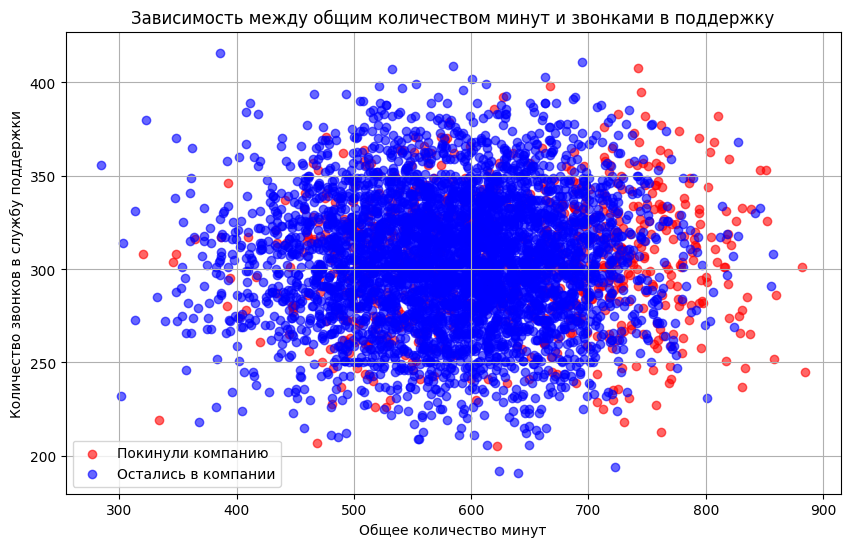

In [55]:
# Визуализировать точечный график по общему количеству минут / количеству звонков в поддержку, подкрасив точки в зависимости от оттока абонента

# Разделяем данные на две группы: покинувшие компанию и оставшиеся
churned_true = df[df['churned'] == True]  # Клиенты, покинувшие компанию
churned_false = df[df['churned'] == False]  # Клиенты, оставшиеся в компании

# Построение scatter plot
plt.figure(figsize=(10, 6))

# Точки для клиентов, покинувших компанию (красный цвет)
plt.scatter(
    churned_true['sum_minutes'],
    churned_true['number_customer_service_calls'],
    color='red',
    label='Покинули компанию',
    alpha=0.6
)

# Точки для клиентов, оставшихся в компании (синий цвет)
plt.scatter(
    churned_false['sum_minutes'],
    churned_false['number_customer_service_calls'],
    color='blue',
    label='Остались в компании',
    alpha=0.6
)

# Добавление подписей осей и заголовка
plt.xlabel('Общее количество минут')
plt.ylabel('Количество звонков в службу поддержки')
plt.title('Зависимость между общим количеством минут и звонками в поддержку')

# Добавление легенды
plt.legend()

# Отображение графика
plt.grid(True)
plt.show()

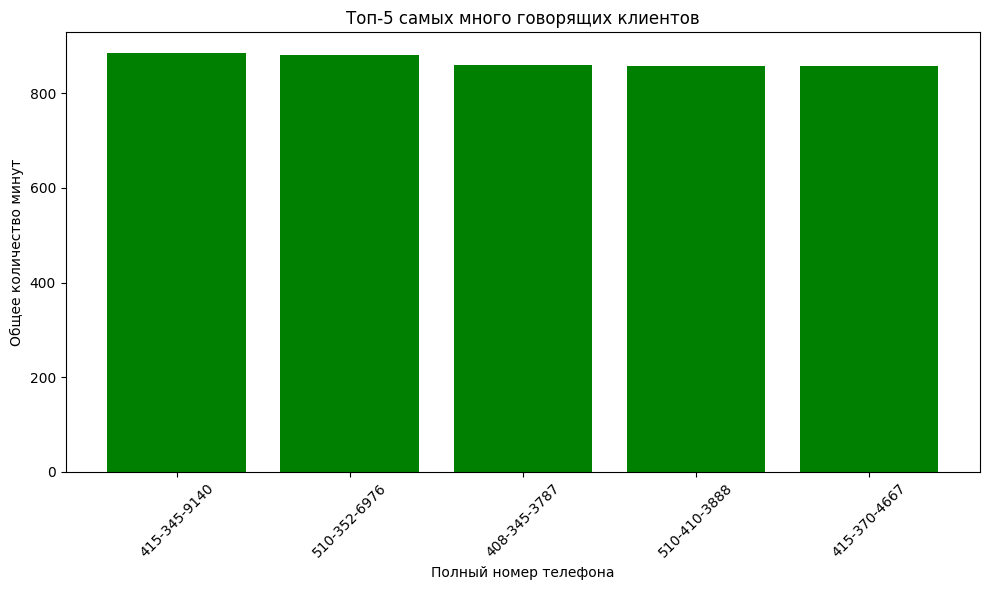

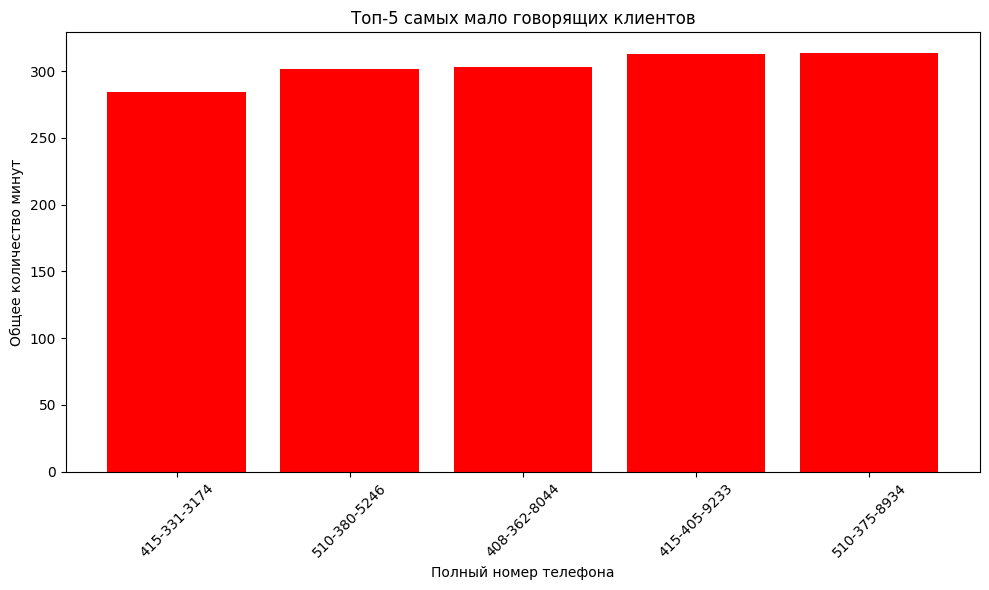

In [56]:
# Создаем новый столбец с полным номером телефона
df['full_phone_number'] = df['area_code'].astype(str) + '-' + df['phone_number'].astype(str)

# Топ-5 самых много говорящих
top_5_most_talking = df.sort_values(by='sum_minutes', ascending=False).head(5)
plt.figure(figsize=(10, 6))
plt.bar(top_5_most_talking['full_phone_number'], top_5_most_talking['sum_minutes'], color='green')
plt.title('Топ-5 самых много говорящих клиентов')
plt.xlabel('Полный номер телефона')
plt.ylabel('Общее количество минут')
plt.xticks(rotation=45)
plt.tight_layout()  # Улучшает отображение меток оси X
plt.show()

# Топ-5 самых мало говорящих
top_5_least_talking = df.sort_values(by='sum_minutes', ascending=True).head(5)
plt.figure(figsize=(10, 6))
plt.bar(top_5_least_talking['full_phone_number'], top_5_least_talking['sum_minutes'], color='red')
plt.title('Топ-5 самых мало говорящих клиентов')
plt.xlabel('Полный номер телефона')
plt.ylabel('Общее количество минут')
plt.xticks(rotation=45)
plt.tight_layout()  # Улучшает отображение меток оси X
plt.show()

In [57]:
# Вывести долю оттока клиентов и среднюю стоимость минуты дневного времени разговора в зависимости от штата

# Группируем данные по штатам
state_metrics = df.groupby('state').agg(
    total_clients=('churned', 'size'),  # Общее количество клиентов в штате
    churned_clients=('churned', 'sum'),  # Количество покинувших клиентов (True = 1, False = 0)
    total_day_charge=('total_day_charge', 'sum'),  # Общая стоимость дневных звонков
    total_day_minutes=('total_day_minutes', 'sum')  # Общая длительность дневных звонков
).reset_index()

# Вычисляем долю оттока клиентов
state_metrics['churn_rate'] = state_metrics['churned_clients'] / state_metrics['total_clients']

# Вычисляем среднюю стоимость минуты дневного времени
state_metrics['avg_day_minute_cost'] = state_metrics['total_day_charge'] / state_metrics['total_day_minutes']

# Выводим результат
print(state_metrics[['state', 'churn_rate', 'avg_day_minute_cost']])

   state  churn_rate  avg_day_minute_cost
0     AK    0.069444             0.170002
1     AL    0.104839             0.170001
2     AR    0.173913             0.170003
3     AZ    0.101124             0.170003
4     CA    0.269231             0.170003
5     CO    0.114583             0.170003
6     CT    0.161616             0.170002
7     DC    0.102273             0.170006
8     DE    0.159574             0.170004
9     FL    0.133333             0.170003
10    GA    0.120482             0.170004
11    HI    0.058140             0.170000
12    IA    0.115942             0.170008
13    ID    0.117647             0.170003
14    IL    0.079545             0.170003
15    IN    0.142857             0.170003
16    KS    0.181818             0.170002
17    KY    0.151515             0.170007
18    LA    0.085366             0.170004
19    MA    0.165049             0.170000
20    MD    0.205882             0.170003
21    ME    0.184466             0.170005
22    MI    0.174757             0

In [69]:
# Разбить данные на множества для обучения и для проверки, отобрав признаки для обучения модели классификации (убрать номер телефона, код региона, признаки планов + все добавленные атрибуты)

columns_to_drop = ['phone_number', 'area_code', 'international_plan', 'voice_mail_plan']
df = df.drop(columns=columns_to_drop)

# Преобразуем категориальный признак 'state' в one-hot формат
df = pd.get_dummies(df, columns=['state'], drop_first=True)

# Проверка оставшихся столбцов
print("\nОставшиеся столбцы:")
print(df.columns)





Оставшиеся столбцы:
Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned', 'state_AL', 'state_AR',
       'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE',
       'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
       'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD',
       'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT',
       'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM',
       'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA',
       'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'stat

In [75]:
# Разбиение данных на обучающую и тестовую выборки
# Определяем признаки (X) и целевую переменную (y)
X = df.drop(columns=['churned'])  # Все признаки, кроме целевой переменной
y = df['churned']  # Целевая переменная

# Разбиение на обучающую и тестовую выборки (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучение модели
# Используем логистическую регрессию с увеличенным max_iter и другим solver
model = LogisticRegression(solver='saga', max_iter=5000, random_state=42)

# Отключение предупреждений (если нужно)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

model.fit(X_train, y_train)

# Предсказание и оценка модели
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f"\nТочность модели: {accuracy:.2f}")

# Вывод отчета о классификации
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred))


Точность модели: 0.87

Отчет о классификации:
              precision    recall  f1-score   support

       False       0.88      0.99      0.93       861
        True       0.62      0.14      0.23       139

    accuracy                           0.87      1000
   macro avg       0.75      0.56      0.58      1000
weighted avg       0.84      0.87      0.83      1000



    Точность модели составляет 87% , что является хорошим показателем.
    Это означает, что модель правильно классифицирует большую часть данных, но важно понимать, как она работает с каждым из классов.
     